In [3]:
from PIL import Image
from deepface import DeepFace
from helper_functions import makedir, progress_update, frame_to_int, emotions_dictionary_to_df
from matplotlib import pyplot as plt
from tqdm import tqdm

import cv2
import json
import numpy as np
import os
import pandas as pd
import time

## Create video into frames

In [33]:
parent_dir = 'Data/Donald Trump' # dir where your video is located
video_name = 'Trump Full Interview with David Muir _ ABC News.mp4' # name of the video


video_path = f"{parent_dir}/{video_name}"
output_dir = f"{parent_dir}/frames/{video_name}" # save frames here
output_csvs = f"{parent_dir}/output" # save output csv data here

makedir(output_dir)
makedir(output_csvs)

Data/Donald Trump/frames/Trump Full Interview with David Muir _ ABC News.mp4 already exists
Data/Donald Trump/output already exists


In [30]:
cap = cv2.VideoCapture(video_path)
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # number of frames in the video
print("total num of frames:", num_frames)

vidcap = cv2.VideoCapture(video_path)
success,image = vidcap.read()
count = 0

start_time = time.time() # measure estimated time to complete

while success:
    if count % 3000 == 0: # skip every x frames
        cv2.imwrite(f"{output_dir}/frame_{count}.jpg", image)     # save frame as JPEG file
        
    success, image = vidcap.read()
    
    count += 1
    if count % 100 == 0:
        progress_update(start_time, count, num_frames)

progress_update(start_time, count, num_frames)

total num of frames: 41818


## Extract faces with Trump

In [34]:
# if face is the same one we are looking for, then do emotion analysis
reference_image = 'Data/Donald Trump/trump.jpg'

verified_frames = []

for frame in tqdm(os.listdir(output_dir)):
    frame_path = f"{output_dir}/{frame}"

    # check if trump face is in frame
    result = DeepFace.verify(img1_path = frame_path, 
                         img2_path = reference_image, 
                         enforce_detection = False, # give false when failed to detect face
    )

    if result['verified']:
        verified_frames.append(frame)

print("Number of frames with matching face", len(verified_frames))

df = pd.DataFrame(verified_frames, columns=['verified_frame'])
df.to_csv(f"{parent_dir}/output/{video_name}_face_verified.csv", index=False)

  0%|          | 0/14 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 1/14 [00:00<00:11,  1.14it/s]

1/1 [==============================] - 0s 33ms/step


 14%|█▍        | 2/14 [00:01<00:07,  1.53it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 3/14 [00:01<00:06,  1.73it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 4/14 [00:02<00:05,  1.91it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 5/14 [00:02<00:04,  2.01it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 6/14 [00:03<00:03,  2.07it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 7/14 [00:03<00:03,  2.11it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 8/14 [00:04<00:02,  2.17it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 9/14 [00:04<00:02,  2.18it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 10/14 [00:05<00:01,  2.18it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 11/14 [00:05<00:01,  2.17it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 12/14 [00:05<00:00,  2.18it/s]

1/1 [==============================] - 0s 21ms/step


 93%|█████████▎| 13/14 [00:06<00:00,  2.18it/s]

1/1 [==============================] - 0s 24ms/step


100%|██████████| 14/14 [00:06<00:00,  2.05it/s]


Number of frames with matching face 7


## Display an example frame

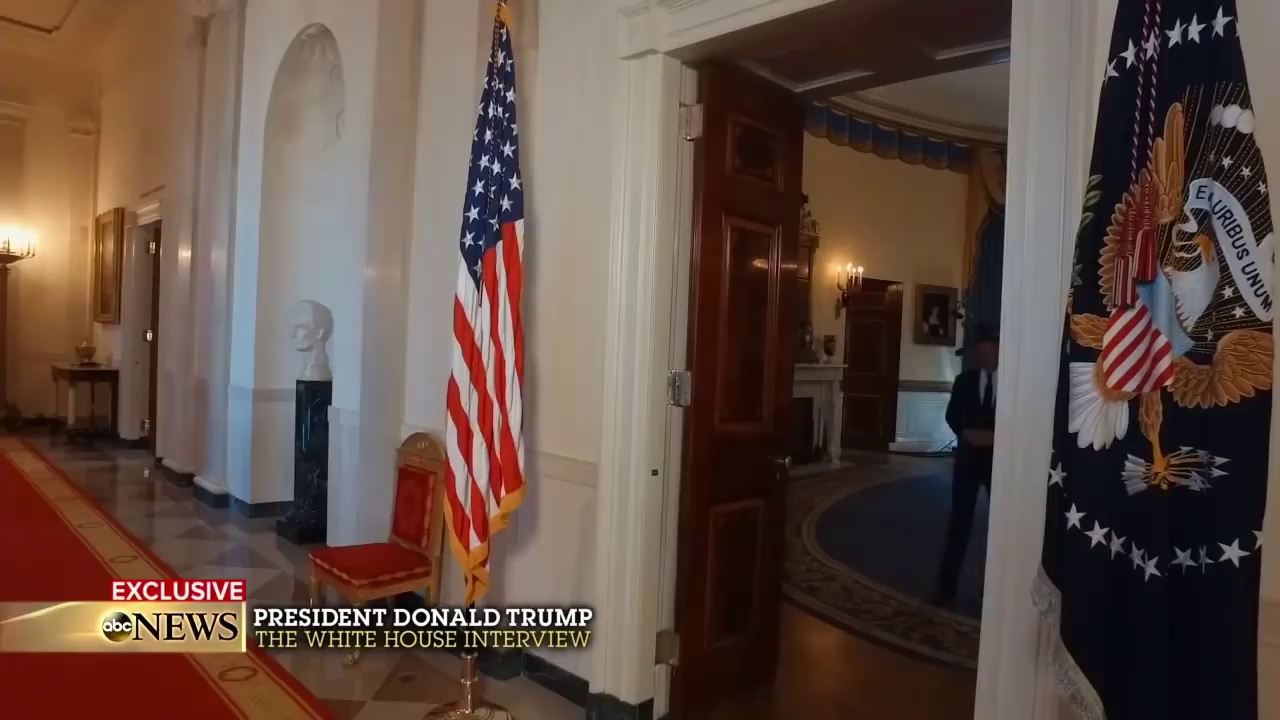

In [48]:
image = Image.open(f"{output_dir}/frame_0.jpg", 'r')
image

## Emotion analysis

In [35]:
# store the emotions in a dictionary
emotions_dict = {}

start = time.time()
count = 0

num_frames = len(verified_frames)

for frm in verified_frames:
    # analyze the emotion for this frame
    frm_path = f"{output_dir}/{frm}"
    
    obj = DeepFace.analyze(img_path = frm_path, actions = ['emotion'])
    emotions_dict[frm] = obj
    
    count += 1
    progress_update(start_time, count, num_frames)

progress_update(start_time, count, num_frames)

1/1 [==============================] - 0s 24ms/step.51 minut


## Convert to csv

In [47]:
df = emotions_dictionary_to_df(emotions_dict)
df.to_csv(f"{parent_dir}/output/{video_name}_emotions.csv", index=False)
df

,frame_name,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion,x,y,w,h
0,frame_15000.jpg,18.846586,1.783446e-07,0.050908,0.112926,12.591088,5.550685e-04,68.397941,neutral,910,125,115,115
1,frame_21000.jpg,52.717632,3.346568e-01,23.672364,0.007101,2.292880,1.159600e+01,9.379366,angry,451,171,298,298
2,frame_24000.jpg,45.776257,2.653086e-02,14.644083,0.022230,34.655783,2.957835e-02,4.845539,angry,403,124,396,396
3,frame_27000.jpg,83.898794,7.445613e-05,1.172424,0.000158,14.493819,1.635346e-06,0.434738,angry,948,137,101,101
4,frame_33000.jpg,92.502421,4.667839e-05,1.261682,0.000105,6.210558,8.279313e-07,0.025183,angry,632,267,303,303
5,frame_6000.jpg,26.622668,9.253386e-04,25.467122,0.005002,45.395947,3.310153e-04,2.508007,sad,381,150,422,422
6,frame_9000.jpg,98.129201,1.856180e-01,1.067828,0.001797,0.286001,3.011243e-01,0.028427,angry,443,179,329,329


In [50]:
# convert frame names to integers for sorting
df['int_name'] = df['frame_name'].map(frame_to_int)
df = df.sort_values(by=['int_name'])

## Display emotion graph

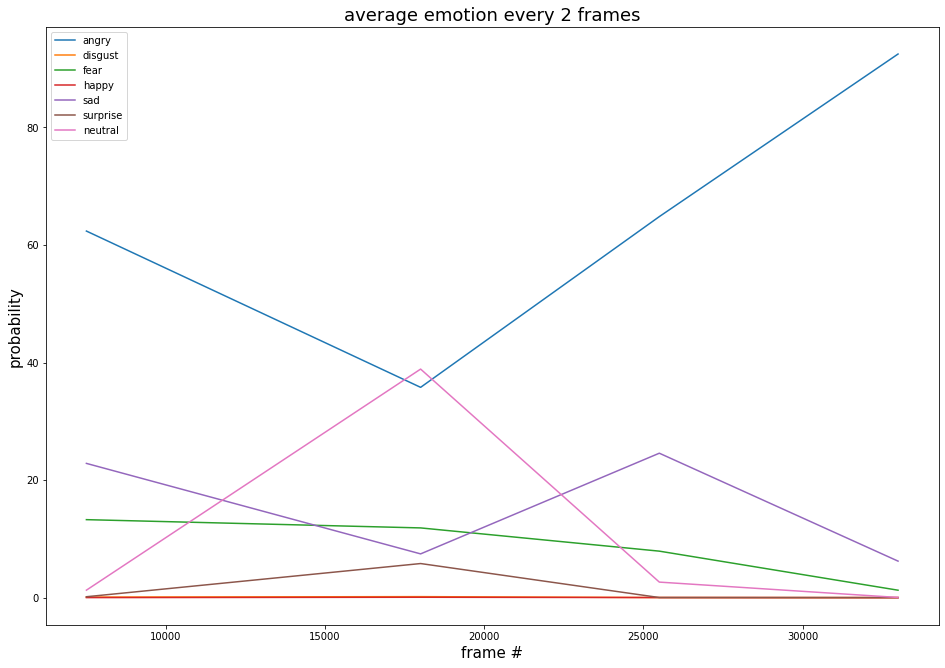

In [51]:
# find mean emotion of every x frames
aggregation = 2

mean_df = df.groupby(np.arange(len(df))//aggregation).mean()

mean_df.iloc[::].plot(x ='int_name', y=['angry',
 'disgust',
 'fear',
 'happy',
 'sad',
 'surprise',
 'neutral'], kind = 'line')

plt.title(f"average emotion every {aggregation} frames", fontsize=18)
plt.xlabel('frame #', fontsize=15)
plt.ylabel('probability', fontsize=15)
plt.rcParams["figure.figsize"] = (16,11)
plt.savefig(f"{output_dir}/{video_name}_emotion_graph.jpg")
plt.show()